## Data Science & Business Analytics Task No. 1
### Prediction using supervised ML
#### By Ritvik Saraf

The task is to predict student's marks on basis of their stud hours. 25 data points are available. Hence, it turns out to be a linear regression problem. We hope to correctly predict the score of student 9.25 hours/day! 

We import the necessary modules first.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

We first import the dataset using pandas from the link provided. The dataset is read and analyzed. The two columns are given their respective titles for convenience in code. 

In [138]:
df = pd.read_csv( 'http://bit.ly/w-data')
df.set_index(['Hours','Scores'])
hours = df['Hours']
scores = df['Scores']
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


We can see that the dependent variable is *scores* and independent variable is *hours.* Both are discrete numerical variables. Let's plot the variables along a scatterplot so we can figure out the relationship between the 2.
###### x->hours, y->scores

In [139]:
plt.figure(figsize=(6,6))
colors = np.linspace(0,100,25)
plt.scatter(hours, scores, marker='*',c=colors,cmap='winter',edgecolors='black',s=200)
plt.title("Hours vs Percentage",fontweight='bold',fontsize=16)
plt.xlabel('No. of Study Hours',fontweight='bold',fontsize=13)
plt.ylabel('Percentage of student',fontweight='bold',fontsize=13)
plt.show()

KeyboardInterrupt: 

It is clear from above scatterplot that the 2 variables share a direct (positive) linear relationship. This can further be affirmed by finding the linear correlation between x & y.<br>
Here, we use Karl Pearson's Correlation Coefficient. If it lies between +0.75 and +1, we can declare them to have a strong positive linear correlation. <br><br>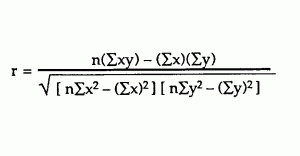
From this moment, every score is calculated in 2 ways:
<ul>
    <li>Direct calculation via available Python Modules & their Functions</li>
    <li>Defining own function to manually compute the value</li>

In [135]:
corr_coeff = df.corr(method='pearson')['Hours']['Scores']
print('Karl Pearson\'s Corrrelation coefficient between x & y: ', correlation_coefficient)

def manual_correlation(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    n = x.shape[0]
    
    cov = np.sum(x*y)/n - mean_x*mean_y
    sd_x = (np.sum(x**2)/n - (mean_x)**2)**0.5
    sd_y = (np.sum(y**2)/n - (mean_y)**2)**0.5
    
    r = cov/(sd_x*sd_y)
    return r

manual_corr_coeff = manual_correlation(hours,scores)

print("'The correlation coefficients by 2 methods give same value: '", corr_coeff - manual_corr_coeff < 0.0000000001) # if difference is less than precision value, it can be considered to be equal

0.9761906560220888
'The correlation coefficients by 2 methods give same value: ' True


The 'True' statement affirms that both methods are one and the same, ie. my function just expands on the Python Module to cover essential concepts. <br>
Correlation is +0.97, high enough to move on to linear regression for prediction of scores on basis of hours.<br><br>
The available dataset is first divided into train and test data. The former trains the model to regression equation and the latter tests it to check its reliability and accuracy.! <br><br>
Simple Linear Regression involves minimizing the summation of least squares.
###### y = bx + a
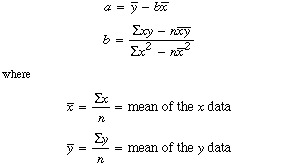<br><br>
Again, both methods are used. 

In [114]:
x_train, x_test, y_train, y_test = train_test_split(hours,scores, test_size=0.25) # 25% o data is used for testing

lin = LinearRegression()
lin.fit(x_train.values.reshape(-1,1), y_train) # reshaping is required to get the array to right shape

print('Via Sklearn Model:')
print('The slope is {0} and intercept is {1}. \nFormula is y = {0:.4f} x + {1:.4f}'.format(lin.coef_[0],lin.intercept_))

def manual_lin_reg(x,y):
    x_mean = np.mean(x) 
    y_mean = np.mean(y)
    n = x.shape[0]
  
    cov = np.sum(x*y)- n*x_mean*y_mean 
    sd_x = np.sum(x*x)-n*x_mean*x_mean 
  
    m = cov/sd_x 
    c = y_mean-m*x_mean
    return m,c

m, c = manual_lin_reg(x_train,y_train)

print('------\n\n Manual:')
print('The slope is {0} and intercept is {1}. \nFormula is y = {0:.4f} x + {1:.4f}'.format(m,c))    

Via Sklearn Model:
The slope is 9.841621646580789 and intercept is 2.6489818534422582. 
Formula is y = 9.8416 x + 2.6490
------

 Manual:
The slope is 9.841621646580787 and intercept is 2.6489818534422795. 
Formula is y = 9.8416 x + 2.6490


We now have the regression equation and can test it on our test data to check accuracy. Various accuracy scores are present, we will be using R2 score.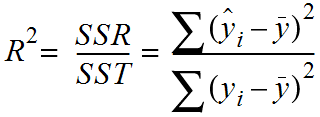<br><br>
R2 score is the proportion of variance in dependent variable that is predicted from independent variable. R2 score above 0.75 can be considered substantial.


In [121]:
y_pred = lin.predict(x_test.values.reshape(-1,1))
print('Via Sklearn Model, R2 score is:')
print(r2_score(y_test, y_pred))

def manual_r2(test,pred):
    mean = np.mean(test)
    s_res_error = np.sum((test - pred)**2)
    t_s_error = np.sum((test - mean)**2)
    r2 = 1 - s_res_error/t_s_error
    return r2

print('------\n\n Manual, R2 score is:')
print(manual_r2(y_test,y_pred))
    

Via Sklearn Model:
0.9627835093260247
------

 Manual:
0.9627835093260247


Since R2 score is 0.96, 96% of variance of data model is captured by the prediction model. Although this forms our baseline model, there is no need for further incremental models.  <br>
Another metric is popular to judge the reliability. We shall use the same too.
Mean 

In [122]:
mean_absolute_error(y_test,y_pred)

4.285978139697493

Thus, since our linear regression model has been proved to be the perfect fit for prediction of y from x. We can rightly use this model to solve the question. We just need to input the value x = 9.25 to the equation and we get the predicted score, y.

##### y = 9.8416 * 9.25 + 2.6490

In [136]:
solution = lin.predict([[9.25]])
print('Predicted score of student is:')
print(solution[0])

Predicted score of student is:
93.68398208431455


### The score of student studing 9.25 hours/day can be predicted to be 
## 93.68 ~ 94. 
The marks are nice. I would however, advise them to go play instead of being a nerd. 